<a href="https://colab.research.google.com/github/vksgm/ML_hands_on/blob/main/Workbook_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyzing Housing Data Set and Predict median income
**

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

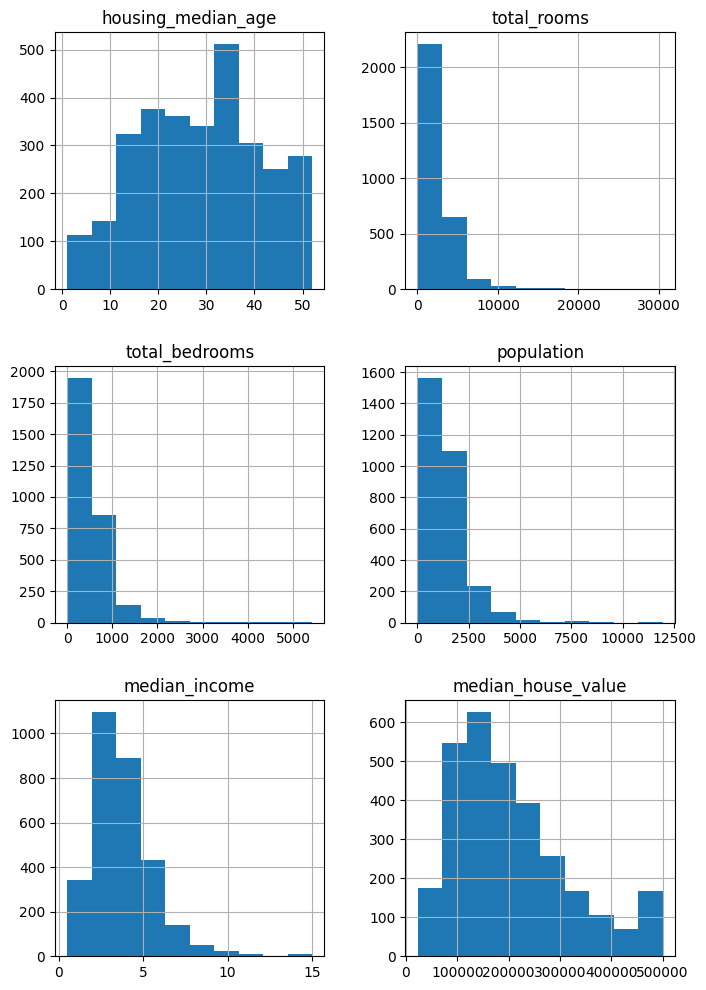

In [ ]:
 import pandas as pd
import seaborn

#Step 1: read the housing data set
housing = pd.read_csv(r'/content/sample_data/california_housing_test.csv')
housing.head()
#for easy notion, lets combine latitude & longitude to single feature
# DONT DO THIS> since string is categorical data and causes issue. better keep as it is
# else we cna change into tuple, but scikit wont understand tuple.
#housing['combine'] = housing['longitude'].astype(str) + ',' + housing['latitude'].astype(str)
housing = housing.drop(['longitude', 'latitude'], axis=1)
housing.head()

#Step 2: figuring out numerical and categorical data. Here all are numeric data only
# We have a categorical data now ( the new feature combine)
# lets ignore it as of now

#Step 3: our Label is median income, so lets treat all others as features
# figuring distinct median incomes
housing['median_income'].value_counts()

# step 4: seems households feature doesnt have an impact for our prediction for me.
# so removing that
housing = housing.drop(['households'], axis=1)
housing.head()
housing.shape
#Step 5: lets plot the histrogram for numerical values
housing.hist(figsize=(8,12))




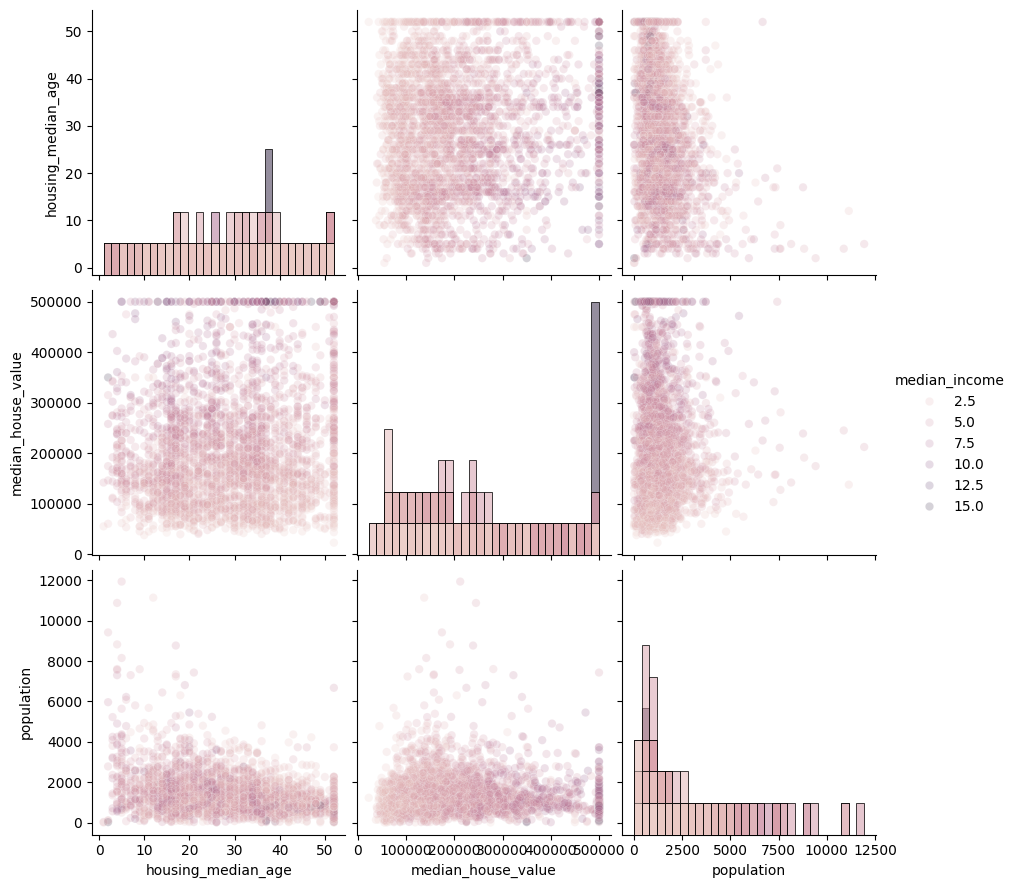

In [ ]:
#Step 6: Use pairplot to visualize how our target (label) differs for each feature values
# here our target ( label ) is 'median income'
# we choose only specific columns which are closely relavant
seaborn.pairplot(data=housing[:5000],
                 vars = ["housing_median_age",
                            "median_house_value",
                            "population"],
                   plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
                            hue='median_income')

**Processing Adult Census DataSet**

In [1]:
!pip install liac-arff
import arff
import pandas as pd

# process Attribute Relation File Format (ARFF) file and get the dataframe out of it
with open('/content/adult-census.arff') as f:
    dataset = arff.load(f)

df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])
print(df.head())

# process ARFF file and get the dataframe out of it
with open('/content/adult-census.arff') as f:
    dataset = arff.load(f)

adult_census = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])
print(adult_census.head())


  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=579f8891539f11695c65cdbf7489f7fbd6bd402ff559e9b74302507f69274b87
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff
    ID   age         workclass   fnlwgt: education:  education-num:  \
0  1.0  39.0         State-gov   77516.0  Bachelors            13.0   
1  2.0  50.0  Self-emp-not-inc   83311.0  Bachelors            13.0   
2  3.0  38.0           Private  215646.0    HS-grad             9.0   
3  4.0  53.0           Private  234721.0       11th             7.0   
4  5.0  28.0           Private  338409.0  Bachelors            13.0   

      marital-status:        occupation:  relationship:  race:    sex:  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divor

**Handling Missing Values**

In [18]:
from sklearn.impute import SimpleImputer

#Fill with the mean value of the feature
imputer = SimpleImputer(strategy="most_frequent")
adult_census = imputer.fit_transform(adult_census)

#KNN Imputer
from sklearn.impute import KNNImputer
#Uses K-nearest neighbors to guess missing values
#imputer = KNNImputer(n_neighbors=3)
#adult_census = imputer.fit_transform(adult_census)

#Iterative Imputer
#Predicts missing values using regression from other features
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
adult_census = imputer.fit_transform(adult_census)




ValueError: could not convert string to float: 'State-gov'

**Seperate data ( features ) and target (  label )**

In [2]:
target_name = "class"
target = adult_census[target_name]
target
data  = adult_census.drop(columns=[target_name])

# Lets also remove categorical columns as we are using KNN

#find the list of unique data types for the features
print(data.dtypes.unique())

# 1. Identify categorical features ( 'object' refers to categorical featues datatype)
# by using inbuilt function select_dtypes( ).
categorical_features = adult_census.select_dtypes(include=['object']).columns.tolist()

# 2. Remove categorical features
data = adult_census.drop(columns=categorical_features)

# Now 'adult_census_numeric' contains only numerical features
# Ideal way is to replace with encoded values. but we see that later.
data
print(
    f"The dataset contains {data.shape[0]} samples and "
    f"{data.shape[1]} features"
)



[dtype('float64') dtype('O')]
The dataset contains 32561 samples and 7 features


**Fitting the model and making predictions**

In [3]:
# training using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=50)
# here _ is generically denotes temp variable
# Here just complete data is getting stored to the model. No computations will happen
_= model.fit(data, target)

#Make some predictions for the same dataset
# Here is where the actual prediction( distance calc ) will happen
target_predicted = model.predict(data)

# lets see how the model predicted
target_predicted[:5]

#Compare actual vs predicted result
target[:5] == target_predicted[:5]

#compute average success rate
print('Avg. Success Rate in manual calculation',(target == target_predicted).mean())

#Instead of doing this manually, we can use score method
accuracy = model.score(data, target)
print('Avg. Success Rate using score method',accuracy)


Avg. Success Rate in manual calculation 0.7863394858880256
Avg. Success Rate using score method 0.7863394858880256


Splitting data set for training and testing

In [4]:
from sklearn.model_selection import train_test_split

# random_State is for seeding
#test_size is the % of test data
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42, test_size=0.25)

# Evaulate with Dummy Classifier to do basline performance check

from sklearn.dummy import DummyClassifier

# the accuracy depends on the total class counts for each class type
print(f"Data class counts:")
print(target_train.value_counts())

#lets benchmark for "<=50k"
class_to_predict = "<=50K"
low_revenue_clf = DummyClassifier(
    strategy="constant", constant=class_to_predict
)
low_revenue_clf.fit(data_train, target_train)
score = low_revenue_clf.score(data_test, target_test)
print(f"Accuracy of a model predicting only low revenue: {score:.3f}")

#lets benchmark for ">=50k"
class_to_predict = ">50K"
high_revenue_clf = DummyClassifier(
    strategy="constant", constant=class_to_predict
)
high_revenue_clf.fit(data_train, target_train)
score = high_revenue_clf.score(data_test, target_test)
print(f"Accuracy of a model predicting only high revenue: {score:.3f}")

#We can see our KNN model performs slightly better than the dummyclassifier.
# Note: We can use Logistic Regression for better performance

#Since data count is not uniform for each class, we can use "most frequent"
# strategy to pick the most frequent used class( <=50k)
most_freq_revenue_clf = DummyClassifier(strategy="most_frequent")
most_freq_revenue_clf.fit(data_train, target_train)
score = most_freq_revenue_clf.score(data_test, target_test)
print(f"Accuracy of a model predicting the most frequent class: {score:.3f}")

Data class counts:
class
<=50K    18506
>50K      5914
Name: count, dtype: int64
Accuracy of a model predicting only low revenue: 0.763
Accuracy of a model predicting only high revenue: 0.237
Accuracy of a model predicting the most frequent class: 0.763


Analysis using Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(data_train, target_train)

accuracy = model.score(data_test, target_test)
print(f"Accuracy of logistic regression: {accuracy:.3f}")

Accuracy of logistic regression: 0.802


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Transformation Model ( perform scaling )**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)

#Computed mean for each feature
print('Scaler Mean',scaler.mean_)

#computed SD for each feature
print('Scaler SD',scaler.scale_)

#call the scalar transform
data_train_scaled = scaler.transform(data_train)
print('Scalar in Numpy Array',data_train_scaled)

#the output will be Numpy by default; We can change to pandas( Dataframe )
scaler = StandardScaler().set_output(transform="pandas")
data_train_scaled = scaler.fit_transform(data_train)
print('Scalar in Dataframe(Pandas)',data_train_scaled)

data_train[:10]

Scaler Mean [1.62854414e+04 3.85981163e+01 1.89678147e+05 1.00895168e+01
 1.04562252e+03 8.89572072e+01 4.03865684e+01]
Scaler SD [9.40499243e+03 1.36381786e+01 1.05216149e+05 2.57457419e+00
 7.16209534e+03 4.05625294e+02 1.22993691e+01]
Scalar in Numpy Array [[-1.72838432  0.76270329  0.03505025 ... -0.14599394 -0.21930883
  -0.03142994]
 [-0.4363046  -0.85041534 -0.52773408 ... -0.14599394 -0.21930883
   0.37509498]
 [ 0.19453057  0.39608542 -0.18721601 ... -0.14599394 -0.21930883
   1.59466973]
 ...
 [-1.64002699 -1.51032751  0.25286853 ... -0.14599394 -0.21930883
  -1.65752961]
 [-0.0520406   0.83602687 -1.28703767 ... -0.14599394 -0.21930883
   3.54598934]
 [ 0.78357942 -0.33715032 -0.58952117 ... -0.14599394 -0.21930883
   1.59466973]]
Scalar in Dataframe(Pandas)              ID       age   fnlwgt:  education-num:  capital-gain:  \
29    -1.728384  0.762703  0.035050       -0.423183      -0.145994   
12181 -0.436305 -0.850415 -0.527734       -0.423183      -0.145994   
18114  0.1

,ID,age,fnlwgt:,education-num:,capital-gain:,capital-loss:,hours-per-week:
29,30.0,49.0,193366.0,9.0,0.0,0.0,40.0
12181,12182.0,27.0,134152.0,9.0,0.0,0.0,45.0
18114,18115.0,44.0,169980.0,7.0,0.0,0.0,60.0
4278,4279.0,59.0,656036.0,13.0,0.0,0.0,60.0
12050,12051.0,54.0,188136.0,13.0,0.0,1408.0,38.0
14371,14372.0,49.0,330874.0,10.0,0.0,0.0,70.0
32541,32542.0,41.0,202822.0,9.0,0.0,0.0,32.0
3362,3363.0,29.0,136277.0,6.0,0.0,0.0,32.0
19009,19010.0,31.0,186144.0,4.0,0.0,0.0,40.0
16041,16042.0,23.0,297152.0,10.0,0.0,0.0,25.0


Using Pipeline to combine both transformtion and prediction

In [7]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#fitting the pipeline with the name of preprocessing transformation fn and predictive fn
model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [8]:
print('The pipeline Model steps are',model.named_steps)
start = time.time()
#calling fit method directly here which does the preprocessing
model.fit(data_train, target_train)
elapsed_time = time.time() - start
print(f"Time to train model: {elapsed_time:.3f} seconds")

predicted_target = model.predict(data_test)
predicted_target[:5]

# We can directly call entire pipeline by just calling score method
#retriving model name( at index 1)
model_name = model[1].__class__.__name__
score = model.score(data_test, target_test)
print(
    f"The accuracy using a {model_name} is {score:.3f} "
    f"with a fitting time of {elapsed_time:.3f} seconds "
    f"in {model[-1].n_iter_[0]} iterations"
)

The pipeline Model steps are {'standardscaler': StandardScaler(), 'logisticregression': LogisticRegression()}
Time to train model: 0.447 seconds
The accuracy using a LogisticRegression is 0.819 with a fitting time of 0.447 seconds in 10 iterations


**Cross Validation using K-fold**

In [33]:
%%time
#Import Cross_Validate
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), LogisticRegression())
#Parameter cv defines the splitting strategy.(aka K = 5)
cv_result = cross_validate(model, data_train, target_train, cv=5)
cv_result

CPU times: user 1.34 s, sys: 0 ns, total: 1.34 s
Wall time: 828 ms


{'fit_time': array([0.08811903, 0.12904954, 0.13923526, 0.13544393, 0.13529849]),
 'score_time': array([0.02122951, 0.02564907, 0.02211928, 0.02511406, 0.02259612]),
 'test_score': array([0.81224406, 0.81531532, 0.81142506, 0.81142506, 0.81920557])}

**Handling Categorical Data**

In [9]:
#lets consider data with categories also
print(adult_census.head())
#select features based on datatype using make_column_Selector
from sklearn.compose import make_column_selector as selector
#drop the output label
target_name = "class"
#adult_census  = adult_census.drop(columns=[target_name])
#select categorical columns
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(adult_census)

#only categorical columns
categorical_columns
# data of the categorical columns
data_categorical = adult_census[categorical_columns]
data_categorical.head()

#Using Ordinal Encoder



    ID   age         workclass   fnlwgt: education:  education-num:  \
0  1.0  39.0         State-gov   77516.0  Bachelors            13.0   
1  2.0  50.0  Self-emp-not-inc   83311.0  Bachelors            13.0   
2  3.0  38.0           Private  215646.0    HS-grad             9.0   
3  4.0  53.0           Private  234721.0       11th             7.0   
4  5.0  28.0           Private  338409.0  Bachelors            13.0   

      marital-status:        occupation:  relationship:  race:    sex:  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain:  capital-loss:  hours-per-week: native-country:  class  
0         2174.0            0.0             40.0   Uni

,workclass,education:,marital-status:,occupation:,relationship:,race:,sex:,native-country:,class
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


**Using Ordinal Encoder**

In [10]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().set_output(transform="pandas")
#The categorical vlaues are replaced with Numeric values now
# each category will have different range of numbers
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[1:6]

,workclass,education:,marital-status:,occupation:,relationship:,race:,sex:,native-country:,class
1,5.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0,0.0
2,3.0,11.0,0.0,5.0,1.0,4.0,1.0,38.0,0.0
3,3.0,1.0,2.0,5.0,0.0,2.0,1.0,38.0,0.0
4,3.0,9.0,2.0,9.0,5.0,2.0,0.0,4.0,0.0
5,3.0,12.0,2.0,3.0,5.0,4.0,0.0,38.0,0.0


**Using one-hot Encoder**

In [11]:
from sklearn.preprocessing import OneHotEncoder
#sparse_output=False is for didactic purposes, for better memory management.
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
education_column = data_categorical[['education:']]
#get unique category values in education
unique_count = education_column.value_counts()
print('Unique Values in Education',unique_count.size)
data_encoded_onehot = encoder.fit_transform(education_column)
print('the one-hot encoded value has 16 columns as we have 16 unique counts. ie.' ,data_encoded_onehot.shape)


Unique Values in Education 16
the one-hot encoded value has 16 columns as we have 16 unique counts. ie. (32561, 16)


**Using Encoders for scaling categories in pipeline**

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

#One hot Encoder
#will ignore the unseen categorical data during the transformation
#max iteration is increased because in categorical the scaling actually does much
# effective as we would have 0 to 1 values in most of the cases.
model1 = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500))

# Ordinal Encoder
# here -1 is assigned to the unknowns during the transformation
model2 = make_pipeline(
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    LogisticRegression(max_iter=500),
)

from sklearn.model_selection import cross_validate

cv_oneh_result = cross_validate(model2, data_encoded, target)
cv_ord_result = cross_validate(model1, data_encoded, target)
scores1 = cv_oneh_result["test_score"]
print(f"The accuracy is: {scores1.mean():.3f} ± {scores1.std():.3f}")
scores2 = cv_ord_result["test_score"]
print(f"The accuracy is: {scores2.mean():.3f} ± {scores2.std():.3f}")

The accuracy is: 1.000 ± 0.000
The accuracy is: 1.000 ± 0.000


Overall Example

In [10]:
#------------------------1) Reading the file----------------------------------------------
!pip install liac-arff
import arff
import pandas as pd

# process Attribute Relation File Format (ARFF) file and get the dataframe out of it
with open('/content/adult-census.arff') as f:
    dataset = arff.load(f)

df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])
print(df.head())

# process ARFF file and get the dataframe out of it
with open('/content/adult-census.arff') as f:
    dataset = arff.load(f)

data = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# -----------------------Splitting the data and Target-----------------------*
target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])
print(data.head())

#2--------------seperate numerical and categorical data---------------------------*
from sklearn.compose import make_column_selector as selector

# In real time we cannot split directly using dtype. need to examine each feature and decide
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)
#3-------------------Preprocessing features-------------------------------------------*
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#categorical
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
#Numerical
numerical_preprocessor = StandardScaler()

#4------------------Column Transfomer-------------------------------------------------*
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)
#5--------------------Calling Pipeline-------------------------------------------------*
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

#6--------------------Test-Train Split-------------------------------------------------*
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

#7-----------------------Fit the model-------------------------------------------------*
_ = model.fit(data_train, target_train)

#8------------------------Predicting & Scoring --------------------------------------------------*
model.predict(data_test)[:5]
model.score(data_test, target_test)
#------------------------------Valdiate using Dummy Classifier----------------------------*
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(data_train, target_train)
dummy_score = dummy_clf.score(data_test, target_test)

#9-----------------------Cross Validation----------------------------------------------*
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
scores = cv_results["test_score"]

# ----------------------------Printing the scores-----------------------------------------*
print(f"The Actual model accuracy is: {model.score(data_test, target_test):.3f}")
print(f"DummyClassifier accuracy: {dummy_score:.3f}")
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}")

    ID   age         workclass   fnlwgt: education:  education-num:  \
0  1.0  39.0         State-gov   77516.0  Bachelors            13.0   
1  2.0  50.0  Self-emp-not-inc   83311.0  Bachelors            13.0   
2  3.0  38.0           Private  215646.0    HS-grad             9.0   
3  4.0  53.0           Private  234721.0       11th             7.0   
4  5.0  28.0           Private  338409.0  Bachelors            13.0   

      marital-status:        occupation:  relationship:  race:    sex:  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain:  capital-loss:  hours-per-week: native-country:  class  
0         2174.0            0.0             40.0   Uni